In [1]:
from utils import FundamentalData, delta, rank, alpha_example_1, alpha_example_2, alpha_example_4, alpha_example_3, alpha_example_5, FinancialDataProcessor
from threeDF import process_data


In [5]:
def fetch_data():
    while True:
        user_input = input("To fetch data enter 1 else 0: ")
        if user_input == '1':
            process_data()
            break
        elif user_input == '0':
            print("Data fetch aborted.")
            break
        else:
            print("Invalid input. Please enter 1 or 0.")
fetch_data()

Data fetch aborted.


In [19]:
def alpha_example_6(fundamental_data):
    return {
        # 'alpha':"rank(fundamental_data.npm)",
        # 'alpha':"rank(fundamental_data.npm) + rank(fundamental_data.dte)",
        # 'alpha': "ts_rank(fundamental_data.npm, 15)",
        # 'alpha' : "adx(fundamental_data.data, 15)",
        # 'alpha' : "(fundamental_data.peRatio+fundamental_data.revenuePerShare)/ema(fundamental_data.peRatio, 50)",
        # 'alpha' : "(vwap(fundamental_data.data, 14)+1)",
        # 'alpha': "(fundamental_data.peRatio + fundamental_data.revenuePerShare) / (vwap(fundamental_data.data, 20)+1)",
        # 'alpha': "(fundamental_data.peRatio + fundamental_data.revenuePerShare) / (adx(fundamental_data.data, 14)+1)",
        'alpha': "fundamental_data.eps",
        'neutralisation': 'neutr.market',
        'decay': 5,
        'universe' : 13,
        'universe_selector' : '',
    }


/Users/khushnarang/Desktop/HFT/LFT/IFT/utils.py:357: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.weight_matrix[i, j] = alpha_values.loc[self.dates['date'][i], self.stocks['Symbol'][j]]
/Users/khushnarang/Desktop/HFT/LFT/IFT/utils.py:361: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.weight_matrix[i, j] = ((val1)*(decay_x-1) + val2) / decay_x


[[0.00676381 0.00272874 0.00588246 ... 0.0075155  0.00490661 0.00132115]
 [0.00677068 0.00273001 0.00588901 ... 0.0075136  0.0049113  0.00132213]
 [0.0068026  0.00273607 0.00592256 ... 0.00750447 0.00493385 0.00132678]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


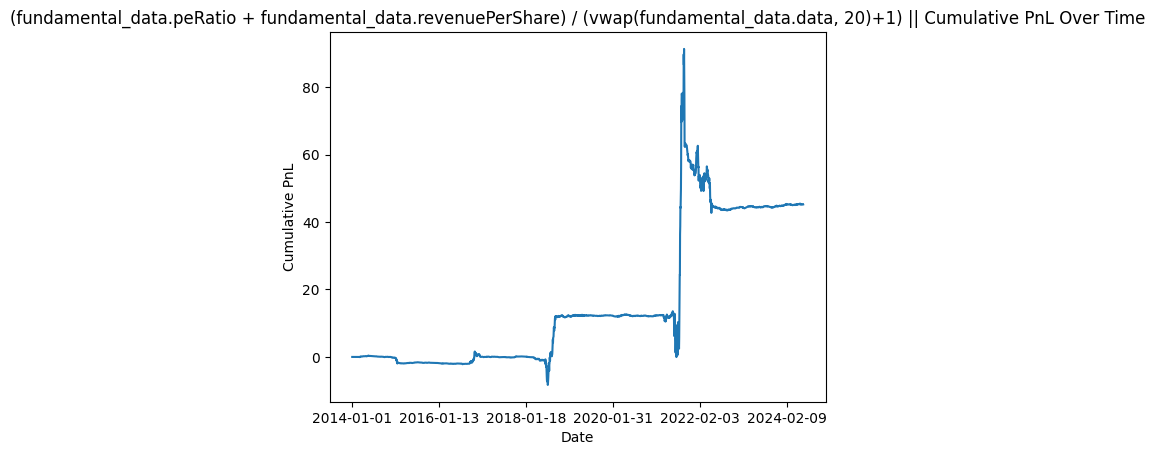

/Users/khushnarang/Desktop/HFT/LFT/IFT/utils.py:518: RuntimeWarning: invalid value encountered in divide
  drawdowns = (peak - cumulative_pnl) / peak


{'std_dev_daily_pnl': np.float64(0.2430158724013706),
 'sharpe_ratio': np.float64(-0.0005433394776822656),
 'max_drawdown': np.float64(nan),
 'average_daily_return': array([-0.00018672,  0.00075189,  0.0022777 ,  0.00074525,  0.00208026,
         0.00103565, -0.00020752, -0.00129648, -0.00012098,  0.00012724,
         0.00112321,  0.00105569,  0.01003443,  0.        ]),
 'average_turnover': np.float64(0.5068612207706671)}

In [20]:
processor = FinancialDataProcessor('date.csv', 'ind_nifty500list.csv', 'my_3d_dataarray.nc', 'sectorData.csv', alpha_example_6)
sector = input("Enter the sector['Financial Services' 'Industrials' 'Basic Materials'....etc, for all of them enter 'All' : ") 
processor.calculate_weights(sector)
processor.calculate_pnl(sector)
processor.plot_cumulative_pnl(sector)
processor.calculate_pnl_quality()